# Task 5 : CREDIT CARD FRAUD DETECTION


- Build a machine learning model to identify fraudulent credit card transactions.
Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
- Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
- Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or
undersampling for improving results.

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# 1. Data Collection

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load and read the data

In [5]:
credit_data = pd.read_csv("/content/sample_data/creditcard.csv")
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,0.211223,0.007477,1.026272,0.057628,-0.024955,-0.368263,0.081684,0.140669,458.92,0.0
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,-0.529027,-0.368394,-0.247773,-1.189156,-0.126040,0.701487,0.277333,-0.222694,0.77,0.0
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,0.039460,0.464476,-0.457193,-0.556105,0.517579,0.008006,0.366054,0.185008,14.00,0.0
5972,6644,1.067611,0.091006,-0.153917,0.704233,0.113894,-0.826866,0.567690,-0.464181,0.957295,...,-0.476723,-1.410090,-0.037550,-0.177773,0.321810,0.114930,-0.109640,0.023205,139.90,0.0
5973,6645,-0.535272,-0.132299,2.180041,1.018303,-1.498819,0.529570,0.420147,0.045445,1.543919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
credit_data.shape

(5974, 31)

In [8]:
# informtion of dataset
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

# 2. Data Processing

In [9]:
# Check null values
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [10]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,...,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000
mean,2677.615501,-0.266159,0.285505,0.844231,0.104200,0.000709,0.194948,0.018324,-0.039006,0.396916,...,-0.043098,-0.161548,-0.036483,0.028960,0.089873,-0.040197,0.025234,0.006116,65.061811,0.000502
std,1765.025532,1.395405,1.208867,1.031448,1.442339,1.185900,1.365525,1.059870,1.304005,1.047749,...,0.883330,0.646380,0.373210,0.619810,0.407680,0.488284,0.364482,0.265131,192.490314,0.022407
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1162.250000,-1.015749,-0.280054,0.295701,-0.839417,-0.609206,-0.677720,-0.492968,-0.189736,-0.264280,...,-0.260507,-0.594625,-0.187108,-0.350226,-0.152744,-0.399334,-0.049681,-0.017776,4.450000,0.000000
50%,2537.000000,-0.420703,0.346083,0.882882,0.161767,-0.083983,-0.142606,0.041761,0.037831,0.360826,...,-0.111701,-0.177197,-0.046772,0.094946,0.106290,-0.079583,0.015976,0.019417,15.620000,0.000000
75%,3781.750000,1.115402,0.941548,1.504158,1.071412,0.441406,0.605784,0.566306,0.343067,0.961662,...,0.059809,0.273148,0.088154,0.435670,0.355157,0.245560,0.155281,0.082701,56.660000,0.000000
max,6645.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


# 3. EDA(Exploratory Data Analysis)


In [11]:
# Number of columns
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
# Unique value in class columns
credit_data.Class.unique()

array([ 0.,  1., nan])

**Class Columns has two values i.e 0 & 1 where 1 is Fraud Case and 0 is Valid case.**

#### Determine Number of fraud cases in the dataset $${{ No. of Fraud case} \over {No. of Valid Case}}$$

In [13]:
fraud_case = credit_data[credit_data['Class'] == 1]
valid_case = credit_data[credit_data['Class'] == 0]

print(f"Number of Fraud Case: {len(fraud_case)}")
print(f"Number of Valid Case: {len(valid_case)}")

total =  len(fraud_case) / len(valid_case)
total

Number of Fraud Case: 3
Number of Valid Case: 5970


0.0005025125628140704

#### In precentage $${{No. of fraud case} \over {total}}*100$$

In [14]:

per = len(fraud_case) / len(credit_data['Class']) * 100
per

0.05021760964178105

**:: Only 0.17% transaction is fraudlent**

## Class Distrubtion

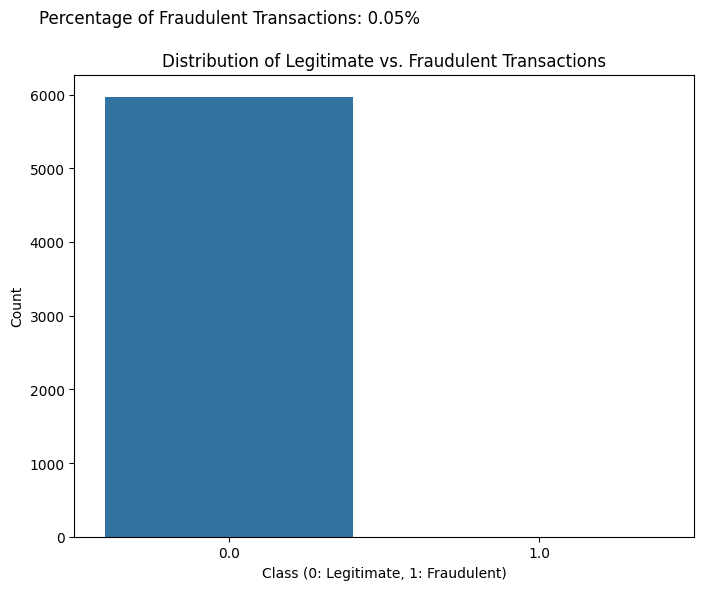

In [15]:
# Count the number of occurrences for each class (0 for legitimate, 1 for fraudulent)
class_counts = credit_data['Class'].value_counts()

# Calculate the percentage of fraudulent transactions
percentage_fraudulent = (class_counts[1] / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit_data)
plt.title('Distribution of Legitimate vs. Fraudulent Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')

# Display the percentage of fraudulent transactions on the plot
plt.text(0, class_counts[0] + 1000, f'Percentage of Fraudulent Transactions: {percentage_fraudulent:.2f}%', fontsize=12, ha='center')

plt.show()


## Time Analysis

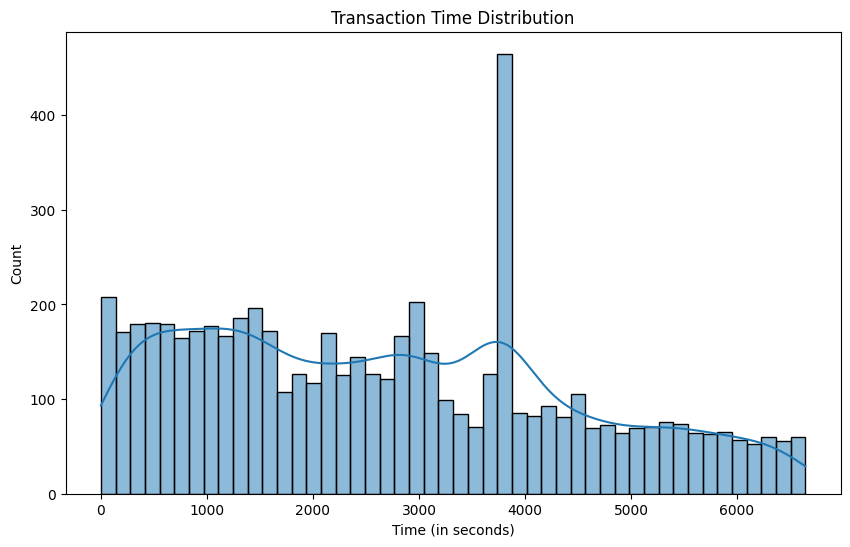

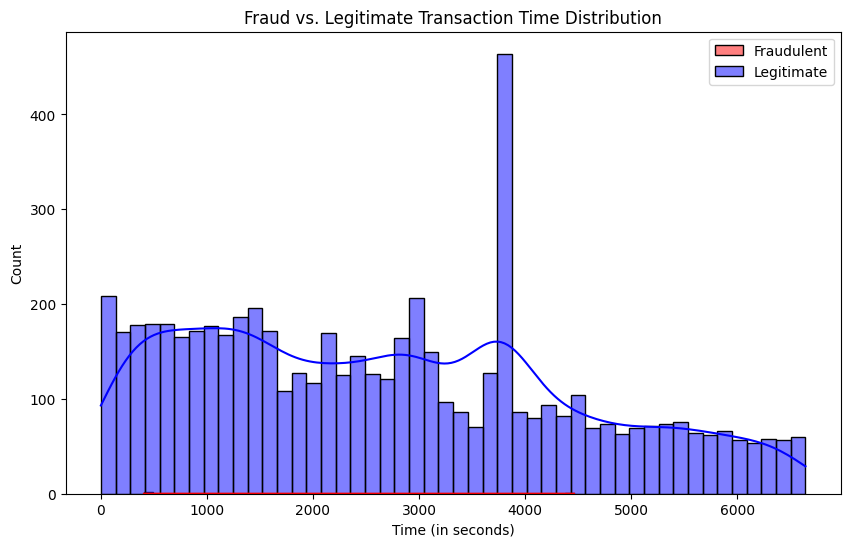

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_data['Time'], bins=48, kde=True)  # Using 48 bins for a daily view
plt.title('Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')

# Check if there are specific times of day when fraud is more likely to occur
plt.figure(figsize=(10, 6))
sns.histplot(credit_data[credit_data['Class'] == 1]['Time'], bins=48, kde=True, color='red', label='Fraudulent')
sns.histplot(credit_data[credit_data['Class'] == 0]['Time'], bins=48, kde=True, color='blue', label='Legitimate')
plt.title('Fraud vs. Legitimate Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')
plt.legend()

plt.show()


## Transaction Amount Analysis

In [20]:
# Calculate summary statistics for both groups
legitimate_summary = legitimate_transactions.describe()
fraudulent_summary = fraudulent_transactions.describe()

print("Summary Statistics for Legitimate Transactions:")
print(legitimate_summary)
print("\nSummary Statistics for Fraudulent Transactions:")
print(fraudulent_summary)

Summary Statistics for Legitimate Transactions:
              Time           V1           V2           V3           V4  \
count  5970.000000  5970.000000  5970.000000  5970.000000  5970.000000   
mean   2677.402010    -0.264965     0.285625     0.844580     0.102656   
std    1764.242849     1.394904     1.208096     1.031037     1.441327   
min       0.000000   -12.168192   -15.732974   -12.389545    -4.657545   
25%    1163.250000    -1.014956    -0.280054     0.296186    -0.840078   
50%    2537.000000    -0.420160     0.346083     0.882882     0.160580   
75%    3779.750000     1.115778     0.941314     1.504158     1.070110   
max    6644.000000     1.685314     7.467017     4.101716     6.013346   

                V5           V6           V7           V8           V9  ...  \
count  5970.000000  5970.000000  5970.000000  5970.000000  5970.000000  ...   
mean      0.000958     0.195420     0.018542    -0.039195     0.397472  ...   
std       1.185941     1.365712     1.059665    

In [19]:
# Assuming 'credit_data' is a DataFrame containing your transaction data
legitimate_transactions = credit_data[credit_data['Class'] == 0]  # Filter for legitimate transactions
fraudulent_transactions = credit_data[credit_data['Class'] == 1]  # Filter for fraudulent transactions

# Calculate summary statistics for both groups
legitimate_summary = legitimate_transactions.describe()
fraudulent_summary = fraudulent_transactions.describe()

print("Summary Statistics for Legitimate Transactions:")
print(legitimate_summary)
print("\nSummary Statistics for Fraudulent Transactions:")
print(fraudulent_summary)

Summary Statistics for Legitimate Transactions:
              Time           V1           V2           V3           V4  \
count  5970.000000  5970.000000  5970.000000  5970.000000  5970.000000   
mean   2677.402010    -0.264965     0.285625     0.844580     0.102656   
std    1764.242849     1.394904     1.208096     1.031037     1.441327   
min       0.000000   -12.168192   -15.732974   -12.389545    -4.657545   
25%    1163.250000    -1.014956    -0.280054     0.296186    -0.840078   
50%    2537.000000    -0.420160     0.346083     0.882882     0.160580   
75%    3779.750000     1.115778     0.941314     1.504158     1.070110   
max    6644.000000     1.685314     7.467017     4.101716     6.013346   

                V5           V6           V7           V8           V9  ...  \
count  5970.000000  5970.000000  5970.000000  5970.000000  5970.000000  ...   
mean      0.000958     0.195420     0.018542    -0.039195     0.397472  ...   
std       1.185941     1.365712     1.059665    

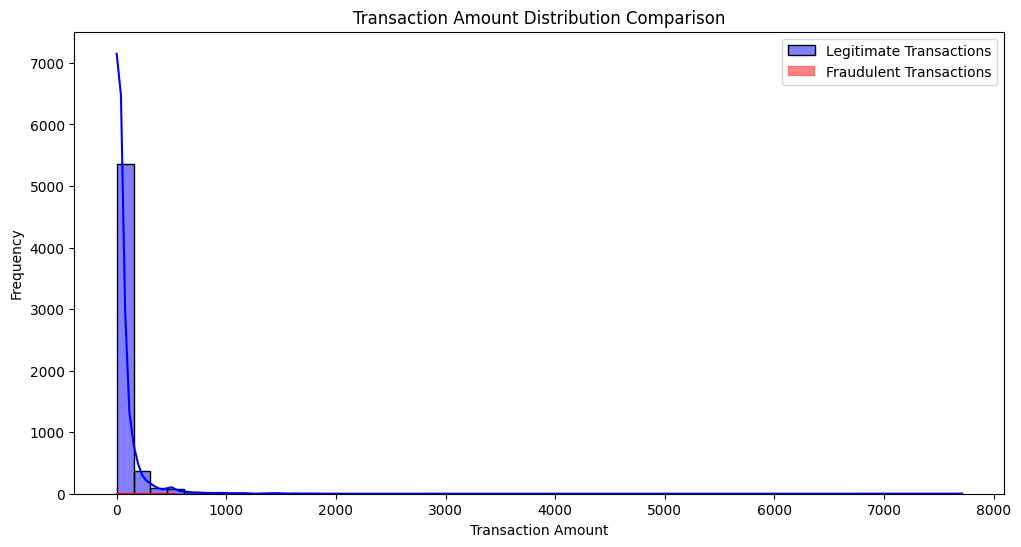

In [21]:
# Separate data for legitimate and fraudulent transactions
legitimate_transactions = credit_data[credit_data['Class'] == 0]['Amount']
fraudulent_transactions = credit_data[credit_data['Class'] == 1]['Amount']

plt.figure(figsize=(12, 6))
sns.histplot(legitimate_transactions, color='blue', kde=True, label='Legitimate Transactions', bins=50)
sns.histplot(fraudulent_transactions, color='red', kde=True, label='Fraudulent Transactions', bins=50)

plt.title('Transaction Amount Distribution Comparison')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()

plt.show()

## Feature Correlation

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000 -0.000414  0.023605  0.027055  0.064945  0.041564  0.092181   
V1     -0.000414  1.000000 -0.204265 -0.195230  0.089013 -0.098441  0.018026   
V2      0.023605 -0.204265  1.000000  0.023919  0.039223  0.064890 -0.070527   
V3      0.027055 -0.195230  0.023919  1.000000  0.205319 -0.097368 -0.238108   
V4      0.064945  0.089013  0.039223  0.205319  1.000000 -0.145946  0.003967   
V5      0.041564 -0.098441  0.064890 -0.097368 -0.145946  1.000000  0.197355   
V6      0.092181  0.018026 -0.070527 -0.238108  0.003967  0.197355  1.000000   
V7     -0.105473 -0.113463  0.132811  0.031793 -0.009356 -0.165091 -0.109064   
V8      0.017927  0.216413 -0.191545  0.031948  0.036508  0.121139  0.020031   
V9      0.427499 -0.120341  0.026080  0.058498 -0.101747 -0.000708  0.029568   
V10    -0.120934 -0.121544  0.160206  0.021178  0.131960  0.013579  0.048836   
V11     0.353317  0.050577  0.029337 -0.

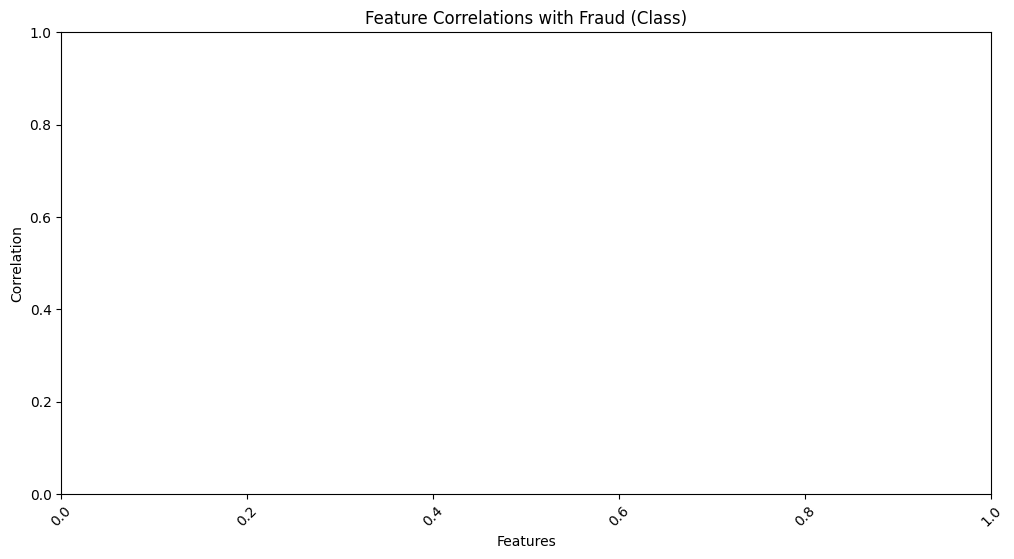

In [22]:
# Calculate the correlation matrix
correlation_matrix = credit_data.corr()
print(correlation_matrix)

# Filter the correlations of features with the target variable ('Class')
feature_correlations = correlation_matrix['Class'].drop('Class')
print(feature_correlations)

correlation_threshold = 0.1

highly_correlated_features = feature_correlations[abs(feature_correlations) > correlation_threshold]

plt.figure(figsize=(12, 6))
sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='viridis')
plt.title('Feature Correlations with Fraud (Class)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)

plt.show()

## Transaction Amount vs. Time:
- **Plot a scatter plot to examine the relationship between transaction amount and time.**

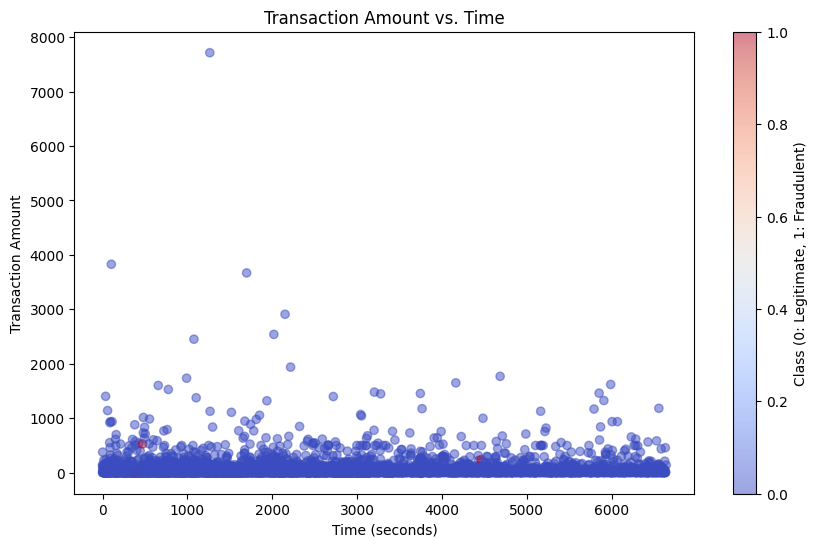

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(credit_data['Time'], credit_data['Amount'], c=credit_data['Class'], cmap='coolwarm', alpha=0.5)
plt.title('Transaction Amount vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.colorbar(label='Class (0: Legitimate, 1: Fraudulent)')

plt.show()


##  Visualize Heatmap for correlation matrix between features.

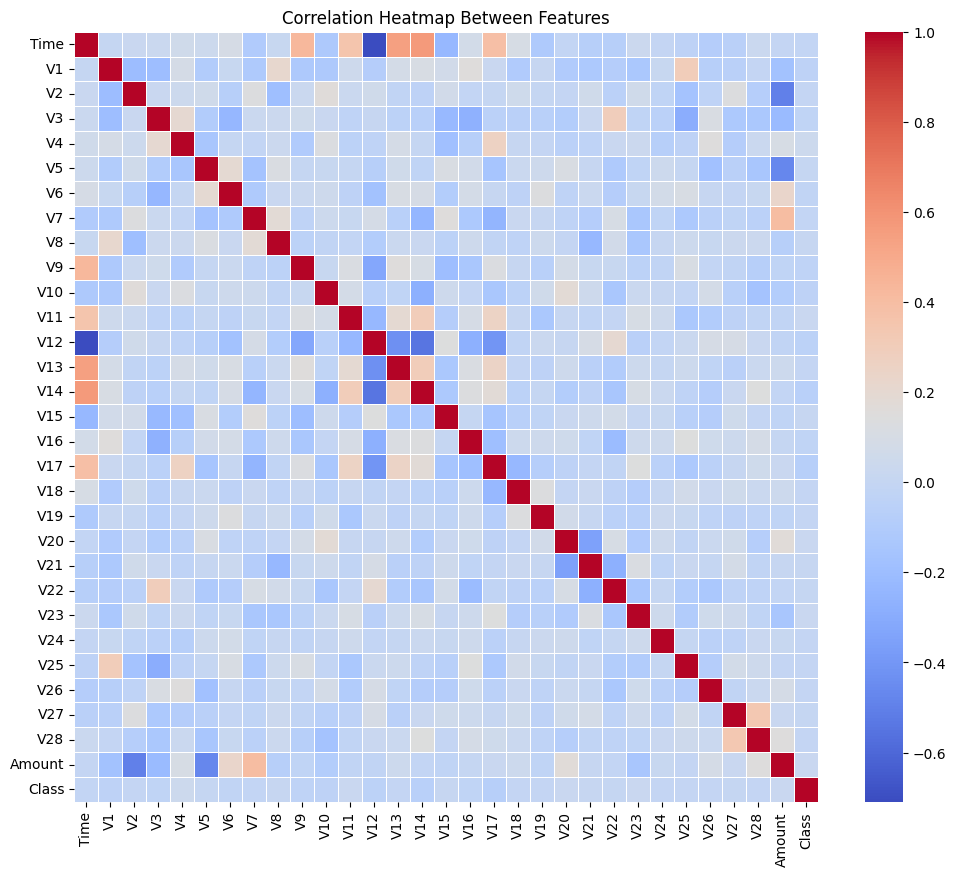

In [24]:
correlation_matrix = credit_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Between Features')
plt.show()

# 4. Developing Model

In [25]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)

**Defined X and Y**

In [26]:
# Test value
X = credit_data.drop(['Class'], axis=1)
# Target value
Y = credit_data['Class']

print(f"value and shapes : {X.values,X.shape}")
print(f"value and shapes : {Y.values,Y.shape}")

value and shapes : (array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 6.63700000e+03, -1.20669568e+00,  2.84728196e-01, ...,
         3.66054370e-01,  1.85007712e-01,  1.40000000e+01],
       [ 6.64400000e+03,  1.06761113e+00,  9.10059945e-02, ...,
        -1.09640422e-01,  2.32053449e-02,  1.39900000e+02],
       [ 6.64500000e+03, -5.35272141e-01, -1.32298734e-01, ...,
                    nan,             nan,             nan]]), (5974, 30))
value and shapes : (array([ 0.,  0.,  0., ...,  0.,  0., nan]), (5974,))


**Spliting the data for training and Testing**|

In [27]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [35]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1881,1448,1.099511,-0.714102,0.303979,-0.177317,-0.401431,0.835766,-0.692951,0.260083,0.779040,...,0.210452,0.071236,0.089161,-0.344379,-1.293416,0.369670,1.187297,-0.062561,0.005582,112.50
2835,2412,-0.558177,0.475508,2.479363,1.013296,-0.304118,0.611804,-0.202171,0.434428,-0.084047,...,0.038103,0.160144,0.630870,-0.031601,0.230040,-0.485549,-0.386918,0.219227,0.154642,12.99
4095,3739,1.314973,-0.498729,0.780156,-0.412901,-1.146490,-0.740209,-0.780601,-0.086521,0.680690,...,-0.072141,-0.203307,-0.524207,0.220270,0.289986,0.040797,-0.507839,-0.011023,0.015913,23.23
1173,915,-0.846062,1.229172,1.199372,-0.159955,-0.100758,-0.133499,0.225048,0.610909,-0.920157,...,0.017812,-0.096225,-0.330107,0.056005,0.013645,-0.249805,0.083841,0.154696,0.046125,8.99
5750,6105,-1.232243,0.436410,3.148751,3.326409,0.171664,0.301685,-0.252100,0.002852,0.876531,...,0.271087,-0.279710,-0.060135,0.228698,0.324566,0.114116,0.197300,0.084238,-0.061551,6.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,3273,-1.321780,-0.900295,1.764513,-0.694127,-1.595632,0.503269,1.358065,0.168836,0.297933,...,0.781871,0.157662,-0.143872,0.872110,0.333699,-0.269814,0.726996,-0.094103,0.138277,406.82
5191,4949,1.031677,-0.006787,0.568099,1.583664,-0.348881,0.030754,-0.214084,0.147572,1.621096,...,-0.285166,-0.187458,-0.287500,-0.047609,0.114755,0.495479,-0.377993,-0.011818,0.003753,48.31
5226,5025,-1.159628,0.318803,2.420991,-0.499201,0.812783,2.196387,-0.421759,0.789287,1.420731,...,-0.315770,-0.004547,0.437589,-0.131258,-1.375890,-0.365931,0.236875,0.002156,0.066420,11.50
5390,5345,-0.914827,0.834317,2.130190,0.935591,-0.460889,0.029705,0.331374,-0.503894,1.797079,...,-0.083733,0.010262,0.640675,-0.307134,0.445520,-0.420362,0.451446,-0.660535,-0.044895,59.90


In [36]:
Y_train


1881    0.0
2835    0.0
4095    0.0
1173    0.0
5750    0.0
       ... 
3772    0.0
5191    0.0
5226    0.0
5390    0.0
860     0.0
Name: Class, Length: 4779, dtype: float64

In [38]:
X_test


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
5956,6604,-0.965886,1.400465,0.546106,-1.072728,0.724583,0.082179,-0.139567,-2.800433,0.547775,...,0.498242,-1.868922,-1.261180,0.014465,-1.098688,-0.215454,0.512105,-0.080029,0.096885,28.48
4332,3760,1.325005,-0.809991,-0.959412,-1.584234,1.419297,3.288968,-1.117940,0.700098,0.355454,...,0.302532,-0.254165,-0.919116,0.046413,0.922049,0.342520,-0.512596,-0.027397,0.022321,81.48
2584,2113,-2.746065,3.022169,-0.134017,-0.386662,-0.244242,0.742847,-1.653331,-6.059684,0.366991,...,-1.072000,5.752131,-2.935378,0.817265,-0.638756,0.153555,0.152716,0.342278,-0.076196,9.87
1755,1356,1.057470,0.003263,0.339138,1.443896,-0.241933,-0.177943,0.115970,-0.009037,0.343912,...,-0.103442,-0.072662,-0.116413,-0.106484,0.074245,0.629171,-0.316821,0.026968,0.024700,63.65
4687,4112,-3.104906,1.210301,0.248620,-1.366092,-2.909295,-0.696190,-2.127176,2.164399,-0.098288,...,-0.622162,0.557374,0.894100,-0.098820,0.459199,0.024300,-0.289626,-0.798323,-0.272227,49.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,5750,-0.573820,1.161151,1.206540,1.052422,0.000209,0.324611,-0.074899,0.557220,0.846454,...,-0.190828,-0.238180,-0.436923,-0.072552,-0.438211,-0.385769,-0.541558,0.040176,0.080021,3.02
1505,1171,0.886678,-0.138970,-0.008022,1.380890,-0.222074,-0.781526,0.666472,-0.379509,-0.143494,...,0.314224,0.096202,0.099462,-0.332800,0.462827,0.832145,-0.301832,-0.014128,0.049434,189.25
925,699,-0.312138,0.505151,1.142142,-1.044567,-0.614837,0.099766,-1.145453,-2.421417,-0.291527,...,0.457138,-1.299302,0.116915,0.075856,0.228515,0.394114,0.798886,-0.026169,0.205294,15.38
3154,2729,1.202512,0.507614,-0.505728,1.218852,0.212962,-1.038625,0.464695,-0.264410,-0.116072,...,-0.048784,-0.095446,-0.313891,-0.184553,-0.067325,0.754415,-0.338470,0.007712,0.043433,40.52


In [39]:
Y_test

5956    0.0
4332    0.0
2584    0.0
1755    0.0
4687    0.0
       ... 
5591    0.0
1505    0.0
925     0.0
3154    0.0
4557    0.0
Name: Class, Length: 1195, dtype: float64

**Building Model**
- **Random Forest is a popular choice for fraud detection because it can handle imbalanced datasets and capture complex relationships between features.**

In [42]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Create an imputer object for handling missing values in Y_train
imputer_y = SimpleImputer(strategy='most_frequent') # Use 'most_frequent' or a constant value for target variable

# Fit the imputer on Y_train and transform it
Y_train_imputed = imputer_y.fit_transform(Y_train.values.reshape(-1, 1))
Y_train_imputed = Y_train_imputed.ravel() # Flatten the array

# Create an imputer object
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well

# Fit the imputer on your training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, train your model using the imputed data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_imputed, Y_train_imputed) # Use imputed Y_train

# Make predictions using the imputed test data
y_pred = model.predict(X_test_imputed)

In [44]:
# Drop rows with any missing values in X_train and Y_train
X_train_clean = X_train.dropna()
Y_train_clean = Y_train.loc[X_train_clean.index]  # Keep corresponding labels

# Train the model on the cleaned data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_clean, Y_train_clean)

# For prediction, you'll need to handle missing values in X_test as well (either impute or drop rows)
# ...

RandomForestClassifier(random_state=42)

In [46]:
print(y_pred)
print(Y_test)

[0. 0. 0. ... 0. 0. 0.]
5956    0.0
4332    0.0
2584    0.0
1755    0.0
4687    0.0
       ... 
5591    0.0
1505    0.0
925     0.0
3154    0.0
4557    0.0
Name: Class, Length: 1195, dtype: float64


# 6. Model Evaluation

In [47]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(Y_test, y_pred))

Confusion Matrix:
 [[1194    0]
 [   1    0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1194
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195


Accuracy Score: 0.999163179916318


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


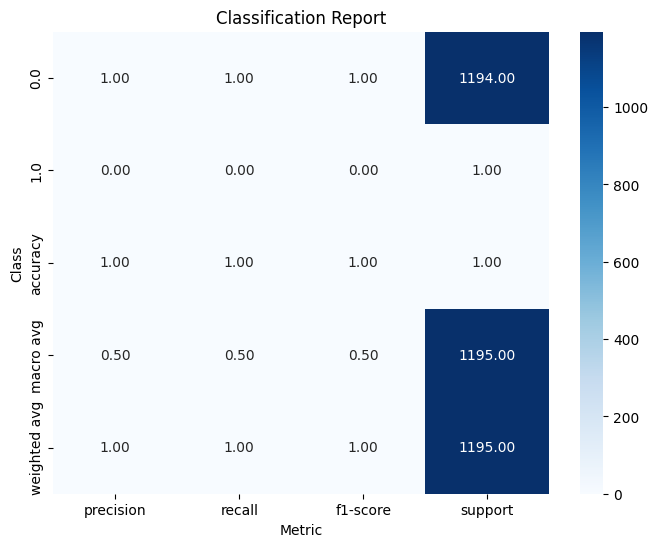

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a classification report
classification_report_dict = classification_report(Y_test, y_pred, output_dict=True)

# Convert the dictionary to a DataFrame
classification_report_df = pd.DataFrame(classification_report_dict).transpose()

# Plot the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(classification_report_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report")
plt.xlabel("Metric")
plt.ylabel("Class")
plt.show()
